In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
train=pd.read_csv('Train_Set.csv')
test=pd.read_csv('Test_Set.csv')

In [137]:
train.shape,test.shape

((126363, 28), (54156, 27))

### Null

In [165]:
test.isna().sum()

OrderId                  0
Customer_Id              0
Customer_Category        0
Cust_State               0
Zipcode                  0
Sales                 1460
Order_zone               0
Price                    0
CategoryName             0
Transcation              0
Dept_Id                  0
Dept_Name                0
Profit_Ratio             0
Discount              2174
Quantity                 0
Order_Profit             0
Product_type             0
Prod_Category_Id         0
ProductLength         1304
ProductWeight          307
Dispatched               0
Shipping_Class           0
Scheduled_Shipping       0
Warehouse_Region         0
Delivery_Review       3896
Session_Ordered       2031
WeekdayOrder             0
dtype: int64

In [166]:
train.isna().sum()

OrderId                  0
Customer_Id              0
Customer_Category        0
Cust_State               0
Zipcode                  0
Sales                 3614
Order_zone               0
Price                    0
CategoryName             0
Transcation              0
Dept_Id                  0
Dept_Name                0
Profit_Ratio             0
Discount              5050
Quantity                 0
Order_Profit             0
Product_type             0
Prod_Category_Id         0
ProductLength         2946
ProductWeight          695
Dispatched               0
Shipping_Class           0
Scheduled_Shipping       0
Warehouse_Region         0
Delivery_Review       9065
Session_Ordered       4792
WeekdayOrder             0
Delivery_Status          0
dtype: int64

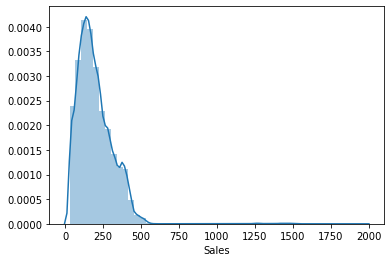

In [167]:
sns.distplot(train['Sales'])

In [168]:
train['Sales'].median(),train['Sales'].mean()

(173.0, 196.11995209736943)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

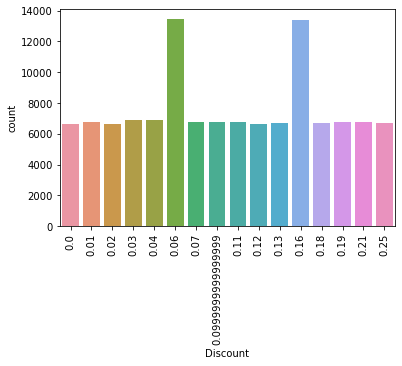

In [169]:
sns.countplot(train['Discount'])
plt.xticks(rotation='vertical')

In [170]:
train['Discount'].median()

0.0999999999999999

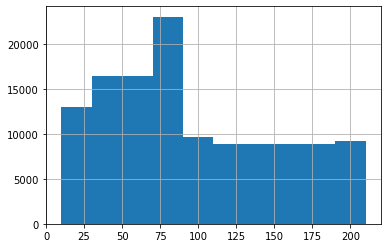

In [171]:
train['ProductLength'].hist()

In [172]:
train['ProductLength'].median(),train['ProductLength'].mean()

(84.0, 95.97617832227327)

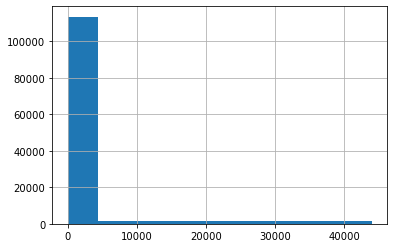

In [173]:
train['ProductWeight'].hist()

In [174]:
train['ProductWeight'].median(),train['ProductLength'].mean()

(1640.0, 95.97617832227327)

(113462,)


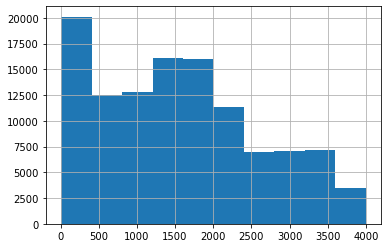

In [175]:
print(train[train['ProductWeight']<4000]['ProductWeight'].shape)
train[train['ProductWeight']<4000]['ProductWeight'].hist()

In [176]:
train[train['ProductWeight']<4000]['ProductWeight'].mean(),train[train['ProductWeight']<4000]['ProductWeight'].median()

(1565.1498563395674, 1489.0)

In [177]:
train['Delivery_Review'].value_counts()

4.0    42860
3.0    41201
2.0    19732
5.0    11640
1.0     1865
Name: Delivery_Review, dtype: int64

In [178]:
train['Delivery_Review'].median()

3.0

In [179]:
print(train['Session_Ordered'].mean(),train['Session_Ordered'].median())
train['Session_Ordered'].value_counts()

2.00149706755723 2.0


2.0    40873
3.0    40440
1.0    40258
Name: Session_Ordered, dtype: int64

In [180]:
from sklearn.impute import SimpleImputer
SI=SimpleImputer(strategy='median',missing_values=np.nan)

In [181]:
SI.fit(train[['Session_Ordered']])
train['Session_Ordered']=SI.transform(train[['Session_Ordered']])
test['Session_Ordered']=SI.transform(test[['Session_Ordered']])

In [182]:
SI.fit(train[['Delivery_Review']])
train['Delivery_Review']=SI.transform(train[['Delivery_Review']])
test['Delivery_Review']=SI.transform(test[['Delivery_Review']])

In [183]:
SI.fit(train[['ProductWeight']])
train['ProductWeight']=SI.transform(train[['ProductWeight']])
test['ProductWeight']=SI.transform(test[['ProductWeight']])

In [184]:
SI=SimpleImputer(strategy='mean',missing_values=np.nan)
SI.fit(train[['ProductLength']])
train['ProductLength']=SI.transform(train[['ProductLength']])
test['ProductLength']=SI.transform(test[['ProductLength']])

In [185]:
SI.fit(train[['Sales']])
train['Sales']=SI.transform(train[['Sales']])
test['Sales']=SI.transform(test[['Sales']])

In [186]:
SI=SimpleImputer(strategy='median',missing_values=np.nan)
SI.fit(train[['Discount']])
train['Discount']=SI.transform(train[['Discount']])
test['Discount']=SI.transform(test[['Discount']])

In [187]:
train.isna().sum()

OrderId               0
Customer_Id           0
Customer_Category     0
Cust_State            0
Zipcode               0
Sales                 0
Order_zone            0
Price                 0
CategoryName          0
Transcation           0
Dept_Id               0
Dept_Name             0
Profit_Ratio          0
Discount              0
Quantity              0
Order_Profit          0
Product_type          0
Prod_Category_Id      0
ProductLength         0
ProductWeight         0
Dispatched            0
Shipping_Class        0
Scheduled_Shipping    0
Warehouse_Region      0
Delivery_Review       0
Session_Ordered       0
WeekdayOrder          0
Delivery_Status       0
dtype: int64

#### Outlier & Scaling

In [188]:
(train['Discount']*100).value_counts()

6.0     13450
16.0    13411
10.0    11847
3.0      6882
4.0      6873
21.0     6798
1.0      6787
7.0      6762
11.0     6754
19.0     6734
18.0     6733
13.0     6702
25.0     6698
2.0      6668
12.0     6636
0.0      6628
Name: Discount, dtype: int64

In [189]:
(test['Discount']*100).value_counts()

6.0     5819
16.0    5785
10.0    4984
0.0     3016
12.0    2987
2.0     2958
13.0    2917
18.0    2910
19.0    2908
25.0    2889
11.0    2866
21.0    2853
7.0     2852
1.0     2833
3.0     2810
4.0     2769
Name: Discount, dtype: int64

In [190]:
train['Discount']=train['Discount']*100
test['Discount']=test['Discount']*100

In [191]:
train['Sales']=np.round(train['Sales'])

In [192]:
train[train['Profit_Ratio']<0]['Profit_Ratio']

11       -0.11
16       -2.60
37       -0.19
43       -0.04
47       -0.01
          ... 
126349   -0.74
126351   -0.21
126352   -1.50
126353   -0.16
126356   -0.74
Name: Profit_Ratio, Length: 23641, dtype: float64

In [194]:
num=train[['Sales','Price','Profit_Ratio','Order_Profit ','ProductLength','ProductWeight']].copy(deep=True)

In [195]:
num

,Sales,Price,Profit_Ratio,Order_Profit,ProductLength,ProductWeight
0,150.0,4383.39,0.08,352.78,191.0,1592.0
1,165.0,4295.72,0.47,2018.10,79.0,1420.0
2,171.0,3616.65,0.26,939.63,67.0,1231.0
3,132.0,9175.86,0.48,4401.74,45.0,1640.0
4,196.0,2779.29,0.13,361.70,43.0,1018.0
...,...,...,...,...,...,...
126358,233.0,3643.45,0.38,1384.97,81.0,728.0
126359,53.0,2793.74,0.31,866.27,86.0,42426.0
126360,102.0,9334.86,0.48,4479.18,45.0,409.0
126361,274.0,7133.94,0.11,785.84,13.0,1690.0


In [196]:
num.columns

Index(['Sales', 'Price', 'Profit_Ratio', 'Order_Profit ', 'ProductLength',
       'ProductWeight'],
      dtype='object')

In [197]:
num.skew()

Sales            2.781415
Price            3.171663
Profit_Ratio    -2.870356
Order_Profit    -4.946131
ProductLength    0.440677
ProductWeight    3.575051
dtype: float64

In [198]:
np.log(num).skew()

Sales           -0.548916
Price            0.321208
Profit_Ratio          NaN
Order_Profit    -1.316721
ProductLength   -0.718180
ProductWeight    0.113135
dtype: float64

In [199]:
np.cbrt(num).skew()

Sales            0.123037
Price            0.825265
Profit_Ratio    -1.608958
Order_Profit    -1.399795
ProductLength   -0.248847
ProductWeight    1.883932
dtype: float64

In [200]:
np.sqrt(num).skew()

Sales            0.538641
Price            1.138023
Profit_Ratio    -0.962066
Order_Profit     1.166158
ProductLength   -0.048042
ProductWeight    2.524735
dtype: float64

In [201]:
num['Order_Profit ']=np.cbrt(num['Order_Profit '])

In [202]:
num[['Sales','Profit_Ratio']]=np.cbrt(num[['Sales','Profit_Ratio']])
num[['Price','ProductWeight']]=np.log(num[['Price','ProductWeight']])
num[['ProductLength']]=np.sqrt(num[['ProductLength']])

In [203]:
test_num=test[num.columns].copy(deep=True)
test_num[['Order_Profit ','Profit_Ratio']]=np.cbrt(test_num[['Order_Profit ','Profit_Ratio']])
test_num[['Sales']]=np.cbrt(test_num[['Sales']])
test_num[['Price','ProductWeight']]=np.log(test_num[['Price','ProductWeight']])
test_num[['ProductLength']]=np.sqrt(test_num[['ProductLength']])

#### CAT NUMERIC Transform

In [204]:
num.columns

Index(['Sales', 'Price', 'Profit_Ratio', 'Order_Profit ', 'ProductLength',
       'ProductWeight'],
      dtype='object')

In [205]:
cat=train.drop(num.columns,axis=1)
cat=cat.drop(['OrderId','Delivery_Status'],axis=1)
cat.head()

,Customer_Id,Customer_Category,Cust_State,Zipcode,Order_zone,CategoryName,Transcation,Dept_Id,Dept_Name,Discount,...,Product_type,Prod_Category_Id,Dispatched,Shipping_Class,Scheduled_Shipping,Warehouse_Region,Delivery_Review,Session_Ordered,WeekdayOrder,Profit_Loss
0,12386,Consumer,AR,19120,Central,Cat-2,UPI,4,Apparel,10.0,...,Fragile,17,0,Standard,4,NORTH,5.0,2.0,0,Profit
1,2630,Consumer,BR,2907,East,Cat-2,UPI,4,Apparel,16.0,...,Fragile,17,0,Standard,6,NORTH,2.0,2.0,1,Profit
2,1752,Corporate,RJ,90214,South,Cat-50,Cash,7,Fan Shop,7.0,...,Not Fragile,46,0,Standard,6,SOUTH,4.0,2.0,0,Profit
3,9268,Consumer,UP,745,East,Cat-12,Credit,4,Apparel,18.0,...,Not Fragile,18,1,2A,4,NORTH,4.0,3.0,1,Profit
4,2888,Corporate,UP,92427,North,Cat-3,UPI,5,Golf,16.0,...,Not Fragile,29,1,Standard,5,CENTRAL,2.0,1.0,0,Profit


In [206]:
test_cat=test.drop(test_num.columns,axis=1)
test_cat=test_cat.drop(['OrderId'],axis=1)
#test_cat.head()

In [207]:
y=train['Delivery_Status']

## 1---------------------------------------------------------------------------------------------------

In [208]:
z=pd.DataFrame(train['Customer_Id'].value_counts())
#mapping zip codes
#print(z)
new=[]
for i in cat['Customer_Id']:
    m=z.loc[i]['Customer_Id']
    if m<=4:
        new.append('VeryLowValueCustomer')
    elif m>4 and m<=8:
        new.append('LowValueCustomer')
    elif m>8 and m<12:
        new.append('MediumValueCustomerI')
    elif m>=12 and m<16:
        new.append('MediumValueCustomerII')
    elif m>=16 and m<20:
        new.append('HighValueCustomer')
    else:
        new.append('VeryHighValueCustomer')

In [209]:
pd.Series(new).value_counts()

MediumValueCustomerI     42399
MediumValueCustomerII    38815
LowValueCustomer         28666
HighValueCustomer         8111
VeryLowValueCustomer      7591
VeryHighValueCustomer      781
dtype: int64

In [210]:
cat['Customer_Id']=new


In [211]:
new=[]
for i in test_cat['Customer_Id']:
    if i in z.index:
        m=z.loc[i]['Customer_Id']
        if m<=5:
             new.append('VeryLowValueCustomer')
        elif m>4 and m<=8:
            new.append('LowValueCustomer')
        elif m>8 and m<12:
            new.append('MediumValueCustomerI')
        elif m>=12 and m<16:
            new.append('MediumValueCustomerII')
        elif m>=16 and m<20:
            new.append('HighValueCustomer')
        else:
            new.append('VeryHighValueCustomer')
    else:
        new.append('LowValueCustomer')

In [212]:

test_cat['Customer_Id']=new


## 2----------------------------------------------------------------------

In [213]:
z=pd.DataFrame(train['Zipcode'].value_counts())
#mapping zip codes
#print(z)
new=[]
for i in cat['Zipcode']:
    m=z.loc[i]['Zipcode']
    if m<=5:
        new.append('VeryLowValue')
    elif m>5 and m<=10:
        new.append('LowValue')
    elif m>10 and m<=15:
        new.append('MediumValue')
    elif m>15 and m<=20:
        new.append('HighValue')
    else:
        new.append('VeryHighValue')

In [214]:
cat['Zipcode']=new

In [215]:
new=[]
for i in test_cat['Zipcode']:
    if i in z.index:
        m=z.loc[i]['Zipcode']
        if m<=5:
            new.append('VeryLowValue')
        elif m>5 and m<=10:
            new.append('LowValue')
        elif m>10 and m<=15:
            new.append('MediumValue')
        elif m>15 and m<=20:
            new.append('HighValue')
        else:
            new.append('VeryHighValue')
    else:
        new.append('LowValue')

In [216]:

test_cat['Zipcode']=new


## 3---------------------------------------------------------------------------------

In [217]:
z=pd.DataFrame(train['CategoryName'].value_counts())
#mapping zip codes
#print(z)
new=[]
for i in cat['CategoryName']:
    m=z.loc[i]['CategoryName']
    if m<=500:
        new.append('LowCountCatrgory')
    elif m>500 and m<=1000:
        new.append('MediumCountCatrgory')
    elif m<=10000 and m>1000:
        new.append('HighCountCatrgory')
    else:
        new.append('VeryHighCountCategory')

In [218]:
cat['CategoryName']=new
pd.Series(new).value_counts()

VeryHighCountCategory    84132
HighCountCatrgory        30343
LowCountCatrgory          8959
MediumCountCatrgory       2929
dtype: int64

In [219]:
new=[]
for i in test_cat['CategoryName']:
    m=z.loc[i]['CategoryName']
    if m<=500:
        new.append('LowCountCatrgory')
    elif m>500 and m<=1000:
        new.append('MediumCountCatrgory')
    elif m<=10000 and m>1000:
        new.append('HighCountCatrgory')
    else:
        new.append('VeryHighCountCategory')

In [220]:
test_cat['CategoryName']=new


## 4---------------------------------------------------------------------------------------

In [221]:
train['CategoryName'].value_counts()

Cat-2     17297
Cat-12    15489
Cat-4     14762
Cat-50    13551
Cat-32    12223
Cat-49    10810
Cat-13     9564
Cat-7      8735
Cat-3      7593
Cat-5      2203
Cat-20     1232
Cat-27     1016
Cat-19      854
Cat-42      799
Cat-8       667
Cat-41      609
Cat-11      458
Cat-21      448
Cat-29      447
Cat-37      418
Cat-15      405
Cat-48      375
Cat-44      365
Cat-22      358
Cat-36      345
Cat-38      336
Cat-34      335
Cat-45      317
Cat-10      311
Cat-40      309
Cat-16      305
Cat-6       304
Cat-14      304
Cat-33      272
Cat-1       265
Cat-9       262
Cat-39      243
Cat-30      230
Cat-24      222
Cat-25      202
Cat-47      202
Cat-35      202
Cat-23      152
Cat-31      137
Cat-46      124
Cat-18       92
Cat-28       82
Cat-17       51
Cat-43       41
Cat-26       40
Name: CategoryName, dtype: int64

In [222]:
cat['Prod_Category_Id'].value_counts()

17    17297
18    15489
24    14762
46    13551
45    12223
48    10810
43     9564
9      8735
29     7593
37     1424
40     1232
36     1016
26      854
35      799
13      779
41      667
75      609
3       458
76      448
63      447
7       418
62      405
74      375
33      365
66      358
68      345
72      336
67      335
32      317
44      311
71      309
64      305
65      304
12      304
59      272
73      265
38      262
69      243
5       230
6       222
61      202
11      202
30      202
70      152
60      137
31      124
2        92
10       82
4        51
34       41
16       40
Name: Prod_Category_Id, dtype: int64

## ---------------------------------------------------------------------------------------

In [223]:
test_cat=test_cat[test_cat.columns].astype('object')
pd.get_dummies(test_cat).shape

(54156, 170)

In [224]:
cat=cat[cat.columns].astype('object')
pd.get_dummies(cat).shape

(126363, 170)

In [225]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [226]:
num.shape,test_num.shape

((126363, 6), (54156, 6))

In [227]:
scaler.fit(num)


numScaler=pd.DataFrame(scaler.transform(num),
                       columns=num.columns)
test_numScaler=pd.DataFrame(scaler.transform(test_num),
                            columns=num.columns)

In [228]:
dum=pd.get_dummies(cat)
test_dum=pd.get_dummies(test_cat)

In [ ]:
numScaler=numScaler.drop('Profit_Ratio',axis=1)

test_numScaler=test_numScaler.drop('Profit_Ratio',axis=1)

In [241]:
X=pd.concat([dum,numScaler],axis=1)
test_X=pd.concat([test_dum,test_numScaler],axis=1)
X.shape,test_X.shape

((126363, 175), (54156, 175))

In [230]:
y.value_counts()

0    84912
1    41451
Name: Delivery_Status, dtype: int64

### Imbalanced Data

In [231]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy=1,random_state=110)

In [232]:
SMOTE?

In [233]:
X0,y0=sm.fit_resample(X,y)

In [234]:
y0.value_counts(),y.value_counts()

(0    84912
 1    84912
 Name: Delivery_Status, dtype: int64,
 0    84912
 1    41451
 Name: Delivery_Status, dtype: int64)

### Model

In [235]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [236]:
X_train,X_test,y_train,y_test=train_test_split(X0,y0,test_size=.1,random_state=110)

In [107]:
y_test.value_counts()

1    8545
0    8438
Name: Delivery_Status, dtype: int64

# 1

In [98]:
Dt=DecisionTreeClassifier()
Dt.fit(X_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.79      0.79      0.79     17047
           1       0.78      0.79      0.79     16578

    accuracy                           0.79     33625
   macro avg       0.79      0.79      0.79     33625
weighted avg       0.79      0.79      0.79     33625

[[13455  3592]
 [ 3531 13047]]


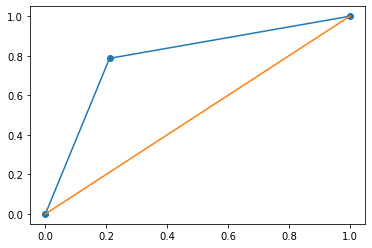

In [99]:
pred_train=Dt.predict(X_train)
pred_test=Dt.predict(X_test)
proba=Dt.predict_proba(X_test)
print(metrics.classification_report(y_test,pred_test))
print(metrics.confusion_matrix(y_test,pred_test))
fpr,tpr,th=metrics.roc_curve(y_test,proba[:,1])
plt.plot(fpr,tpr,marker='o')
plt.plot([0,1],[0,1])

# 2

              precision    recall  f1-score   support

           0       0.94      0.69      0.79     17047
           1       0.75      0.95      0.84     16578

    accuracy                           0.82     33625
   macro avg       0.84      0.82      0.81     33625
weighted avg       0.84      0.82      0.81     33625

[[11699  5348]
 [  808 15770]]


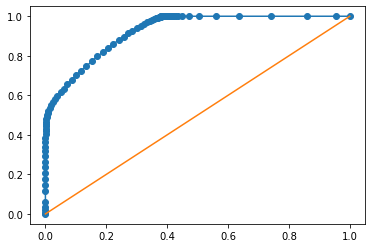

In [100]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

pred_train=RF.predict(X_train)
pred_test=RF.predict(X_test)
proba=RF.predict_proba(X_test)
print(metrics.classification_report(y_test,pred_test))
print(metrics.confusion_matrix(y_test,pred_test))
fpr,tpr,th=metrics.roc_curve(y_test,proba[:,1])
plt.plot(fpr,tpr,marker='o')
plt.plot([0,1],[0,1])

# 3.

              precision    recall  f1-score   support

           0       0.75      0.14      0.24     17047
           1       0.52      0.95      0.67     16578

    accuracy                           0.54     33625
   macro avg       0.64      0.55      0.45     33625
weighted avg       0.64      0.54      0.45     33625

[[ 2391 14656]
 [  780 15798]]


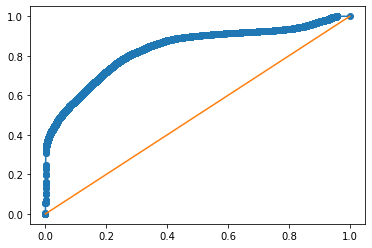

In [101]:
Nb=GaussianNB()
Nb.fit(X_train,y_train)

pred_train=Nb.predict(X_train)
pred_test=Nb.predict(X_test)
proba=Nb.predict_proba(X_test)
print(metrics.classification_report(y_test,pred_test))
print(metrics.confusion_matrix(y_test,pred_test))
fpr,tpr,th=metrics.roc_curve(y_test,proba[:,1])
plt.plot(fpr,tpr,marker='o')
plt.plot([0,1],[0,1])

# 4.

In [102]:
from xgboost import XGBClassifier

[11:25:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      0.62      0.76     16983
           1       0.72      1.00      0.84     16982

    accuracy                           0.81     33965
   macro avg       0.86      0.81      0.80     33965
weighted avg       0.86      0.81      0.80     33965

[[10523  6460]
 [   26 16956]]


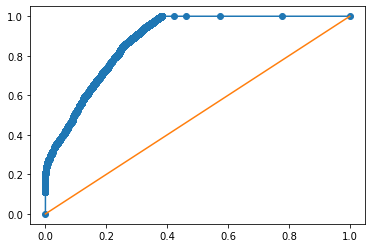

In [103]:
XGB=XGBClassifier(use_label_encoder=False,n_estimators=125,learning_rate=.01,gamma=.5)
XGB.fit(X_train,y_train)

pred_train=XGB.predict(X_train)
pred_test=XGB.predict(X_test)
proba=XGB.predict_proba(X_test)
print(metrics.classification_report(y_test,pred_test))
print(metrics.confusion_matrix(y_test,pred_test))
fpr,tpr,th=metrics.roc_curve(y_test,proba[:,1])
plt.plot(fpr,tpr,marker='o')
plt.plot([0,1],[0,1])

# 4.2

In [123]:
XGBClassifier?

[18:53:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      0.62      0.76      8438
           1       0.73      1.00      0.84      8545

    accuracy                           0.81     16983
   macro avg       0.86      0.81      0.80     16983
weighted avg       0.86      0.81      0.80     16983

[[5234 3204]
 [  13 8532]]


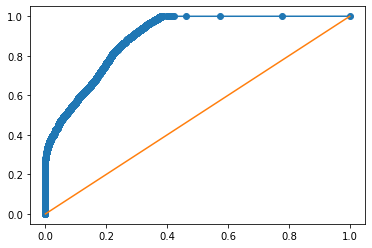

In [237]:
XGB=XGBClassifier(use_label_encoder=False,n_estimators=180,learning_rate=.01,gamma=.5)
XGB.fit(X_train,y_train)

pred_train=XGB.predict(X_train)
pred_test=XGB.predict(X_test)
proba=XGB.predict_proba(X_test)
print(metrics.classification_report(y_test,pred_test))
print(metrics.confusion_matrix(y_test,pred_test))
fpr,tpr,th=metrics.roc_curve(y_test,proba[:,1])
plt.plot(fpr,tpr,marker='o')
plt.plot([0,1],[0,1])

### ------------------------------------------------------------------------------------------------------

In [104]:
sub=pd.DataFrame(index=test['OrderId'])

In [238]:
sub['Delivery_Status']=XGB.predict(test_X)
print(sub['Delivery_Status'].value_counts())

sub.to_csv('Submission.csv')

1    31658
0    22498
Name: Delivery_Status, dtype: int64
